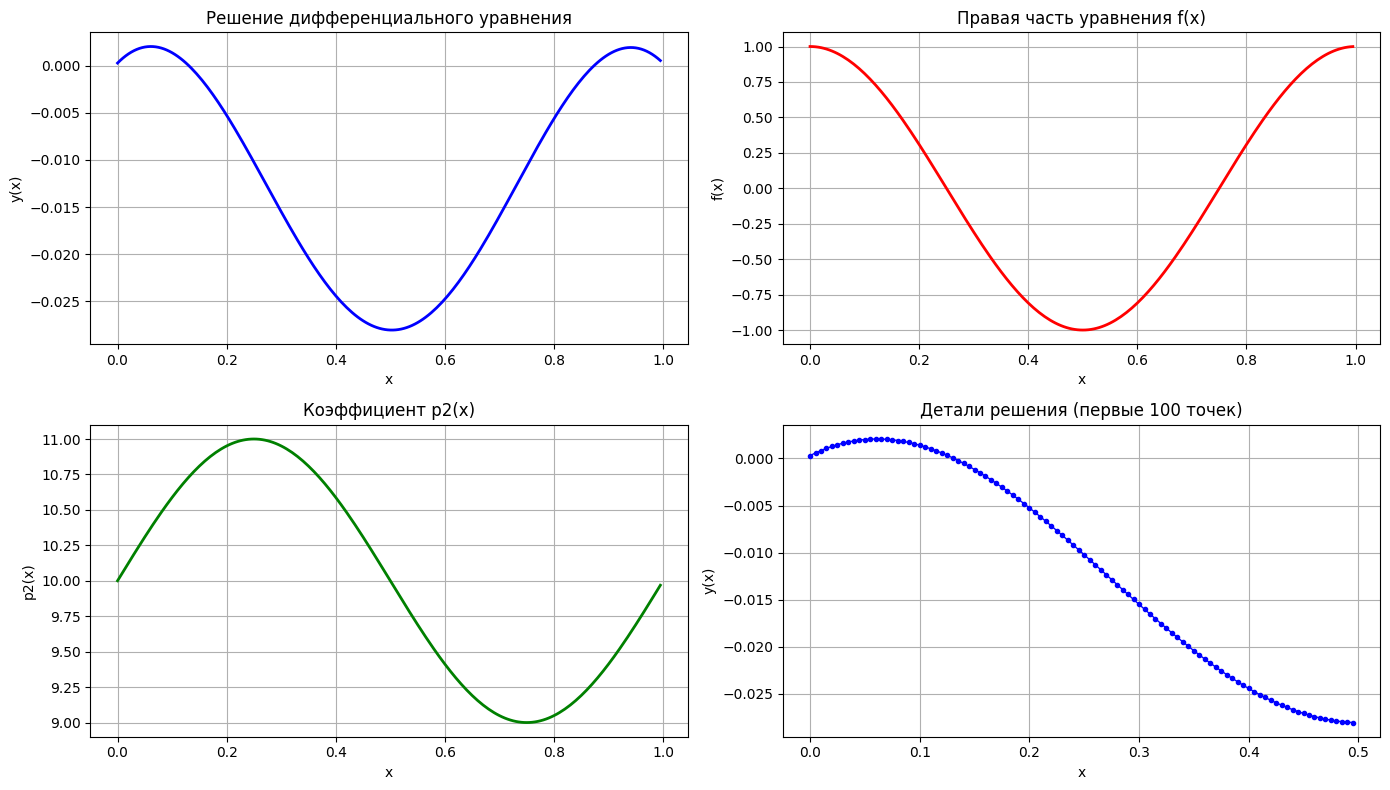

Первые 10 значений решения:
x = 0.00000, y = 0.00031
x = 0.00500, y = 0.00059
x = 0.01000, y = 0.00084
x = 0.01500, y = 0.00107
x = 0.02000, y = 0.00128
x = 0.02500, y = 0.00146
x = 0.03000, y = 0.00162
x = 0.03500, y = 0.00175
x = 0.04000, y = 0.00186
x = 0.04500, y = 0.00195


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Параметры задачи
H = 0.005
N = int(1.0 / H)

# Функции коэффициентов
def p2(x):
    return 10.0 + np.sin(2.0 * np.pi * x)

def f(x):
    return np.cos(2.0 * np.pi * x)

# Реализация метода прогонки для периодических условий
def solve_periodic():
    a = np.full(N, -1.0)
    b = np.zeros(N)
    c = np.full(N, -1.0)
    d = np.zeros(N)
    
    # Заполнение матрицы и правой части
    for i in range(N):
        x = i * H
        b[i] = 2.0 + H**2 * p2(x)
        d[i] = H**2 * f(x)
    
    # Прямой ход прогонки
    alpha = np.zeros(N)
    beta = np.zeros(N)
    alpha[0] = c[0] / b[0]
    beta[0] = d[0] / b[0]
    
    for i in range(1, N-1):
        denom = b[i] - a[i] * alpha[i-1]
        alpha[i] = c[i] / denom
        beta[i] = (d[i] - a[i] * beta[i-1]) / denom
    
    # Обработка периодического условия
    denom = b[-1] - a[-1]*alpha[-2] - c[-1]*alpha[0]
    beta_n = (d[-1] - a[-1]*beta[-2] - c[-1]*beta[0]) / denom
    
    # Обратный ход прогонки
    y = np.zeros(N)
    y[-1] = beta_n
    
    for i in range(N-2, -1, -1):
        y[i] = beta[i] - alpha[i] * y[i+1]
    
    return y

# Решение задачи
solution = solve_periodic()

# Создание массива x-координат
x_values = np.linspace(0, 1, N, endpoint=False)

# Построение графиков
plt.figure(figsize=(14, 8))

# Основной график решения
plt.subplot(2, 2, 1)
plt.plot(x_values, solution, 'b-', linewidth=2)
plt.title('Решение дифференциального уравнения')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)

# График правой части
plt.subplot(2, 2, 2)
plt.plot(x_values, f(x_values), 'r-', linewidth=2)
plt.title('Правая часть уравнения f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)

# График коэффициента p2(x)
plt.subplot(2, 2, 3)
plt.plot(x_values, p2(x_values), 'g-', linewidth=2)
plt.title('Коэффициент p2(x)')
plt.xlabel('x')
plt.ylabel('p2(x)')
plt.grid(True)

# Детальный просмотр решения (первые 100 точек)
plt.subplot(2, 2, 4)
plt.plot(x_values[:100], solution[:100], 'b-o', markersize=3, linewidth=1)
plt.title('Детали решения (первые 100 точек)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.grid(True)

plt.tight_layout()
plt.show()

# Сохранение данных
np.savetxt('solution_data.txt', 
           np.column_stack((x_values, solution)), 
           fmt='%.5f', 
           header='x y')

# Вывод первых 10 значений
print("Первые 10 значений решения:")
for i in range(10):
    print(f"x = {x_values[i]:.5f}, y = {solution[i]:.5f}")